In [167]:
import json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import json
from tyssue.io import hdf5
from tyssue.generation.shapes import AnnularSheet
from tyssue.io.hdf5 import load_datasets
from scipy import stats

from tyssue_taylor.models.annular import AnnularGeometry as geom

In [168]:
with open('../assets/benchmark_instances/list_seed.json',
          'r') as inputfile:
    LIST_SEED = json.load(inputfile)['list']

# Simulating an image processing error

In this part we will study the effect of an image processing error. To simulate such an error, we apply a Gaussian noise on the coordinates on the organoid. We obtain a new organoid, called the 'experimental' organoid (in contrast with the initial 'theoritical' organoid). Then, we adjust the line tension values to the experimental organoid and mesure the difference between the resulting line tensions noted $L'$ and the true line tensions from the theoritical organoid noted $L^*$.
    

In [205]:
DIR = '../simulation/segmentation_error/lm_nr_nl_for_intership_report'
list_r = []
list_std = []
for std in (0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1):
    rs = []
    stds = []
    path = DIR + '/tyssue-taylor_serror_' + str(std) + '/simulation/lm_nr_nl/'
    for seed in LIST_SEED:
        path_hdf5 = '../assets/benchmark_instances/pipeline_test_theoritical_organo'+ str(seed) + '.hdf5'
        dsets = load_datasets(path_hdf5)
        th_organo = AnnularSheet('theoritical', dsets)
        true_tensions = th_organo.edge_df.line_tension.values[:3*th_organo.Nf]
        with open(path + 'exp_organo_opt_res' + str(seed) + '.json', 'r') as inputfile:
            dic = json.load(inputfile)
            resx = dic['x']
        slope, intercept, r_value, p_value, std_err = stats.linregress(true_tensions, resx)
        rs.append(r_value)
        stds.append(std_err)
    list_r.append(rs)
    list_std.append(stds)

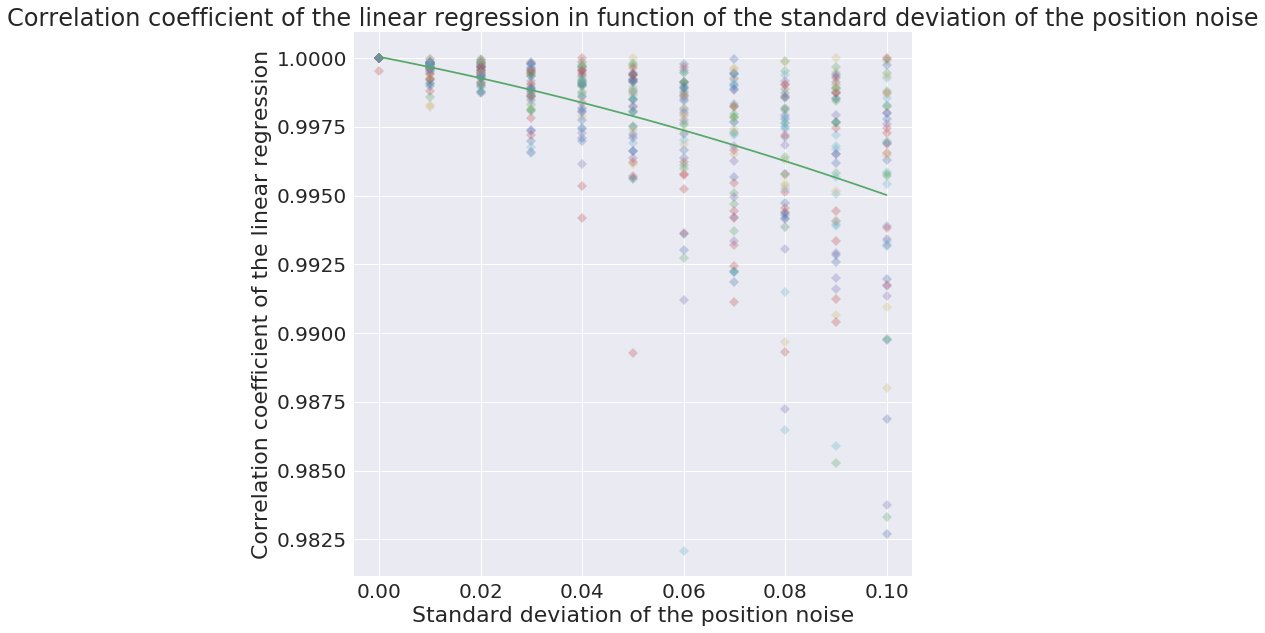

In [206]:
plt.figure(1)
plt.figure(figsize=(10,10))
# Mean gap
y = np.array(list_r)
x = np.array((0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1))
plt.plot(x,y,'D',alpha=0.3)
plt.xlabel('Standard deviation of the position noise')
plt.ylabel('Correlation coefficient of the linear regression')
plt.title('Correlation coefficient of the linear regression in function of the standard deviation of the position noise')

fit = np.mean(np.polyfit(x,y,2), axis=1)
p = np.poly1d(fit)
xp = np.linspace(0.0, 0.1, 100)
plt.plot(xp, p(xp), '-')
plt.grid(True)

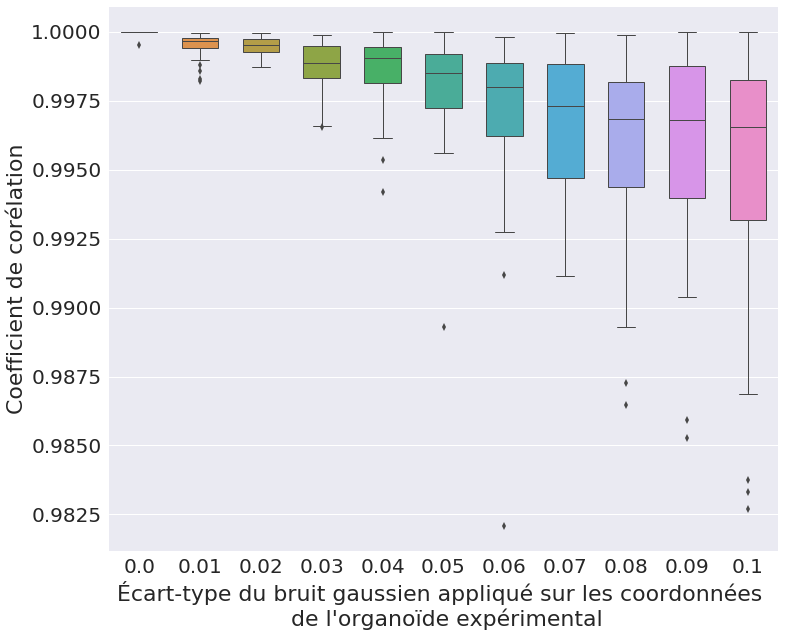

In [211]:
df = pd.DataFrame()
table_r = np.array(list_r)
table_r = np.reshape(table_r, len(list_r)*len(list_r[0]))
table_std = np.concatenate([np.full(len(list_r[0]), i) for i in (0.0, 0.01, 0.02, 0.03, 0.04, 0.05,
                                                                 0.06, 0.07, 0.08, 0.09, 0.1)])
df['Coefficient de corélation'] = table_r
df['Écart-type du bruit gaussien appliqué sur les coordonnées \n de l\'organoïde expérimental'] = table_std
sns.set(style="whitegrid")
sns.set(font_scale=2.0)
fig, ax = plt.subplots(figsize=(12,10))
ax = sns.boxplot(x="Écart-type du bruit gaussien appliqué sur les coordonnées \n de l\'organoïde expérimental", 
                 y="Coefficient de corélation", 
                 data=df, fliersize=5, linewidth = 1, width=0.6)
#ax = sns.swarmplot(x="Écart-type du bruit gaussien appliqué sur les coordonnées de l\'organoïde expérimental",
#                   y="Coefficient de corélation", data=df)
plt.savefig('/home/fquinton/Documents/Stage_M2_ICA-master/tyssue-taylor/simulation/segmentation_error/lm_nr_nl_for_intership_report/plot_se.png')

# Effect of the precision of the initial point

In this section, we will study the effect of the error between the initial point $L_0$ and the true line tension values $L^*$. Given a theoritical organoid with known line tensions $L^*$ and coordinates $X^*$, we generate a copy of this organoid with different line tensions $L_0$ and solve for the energy optimal coordinates $X'$. Then we compute the distance between the theoritical organoid's coordinates $X^*$ and the coordinates $X'$ of the organoid computed with initial point $L_0$.

In [215]:
DIR = '../simulation/lm_nr_nl_init_point_error'
list_r = []
list_std = []
for std in (0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0):
    rs = []
    stds = []
    path = DIR + '/tyssue-taylor' + str(std) + '/simulation/lm_nr_nl/'
    for seed in LIST_SEED:
        path_hdf5 = '../assets/benchmark_instances/pipeline_test_theoritical_organo'+ str(seed) + '.hdf5'
        dsets = load_datasets(path_hdf5)
        th_organo = AnnularSheet('theoritical', dsets)
        true_tensions = th_organo.edge_df.line_tension.values[:3*th_organo.Nf]
        with open(path + 'exp_organo_opt_res' + str(seed) + '.json', 'r') as inputfile:
            dic = json.load(inputfile)
            resx = dic['x']
        slope, intercept, r_value, p_value, std_err = stats.linregress(true_tensions, resx)
        rs.append(r_value)
        stds.append(std_err)
    list_r.append(rs)
    list_std.append(stds)

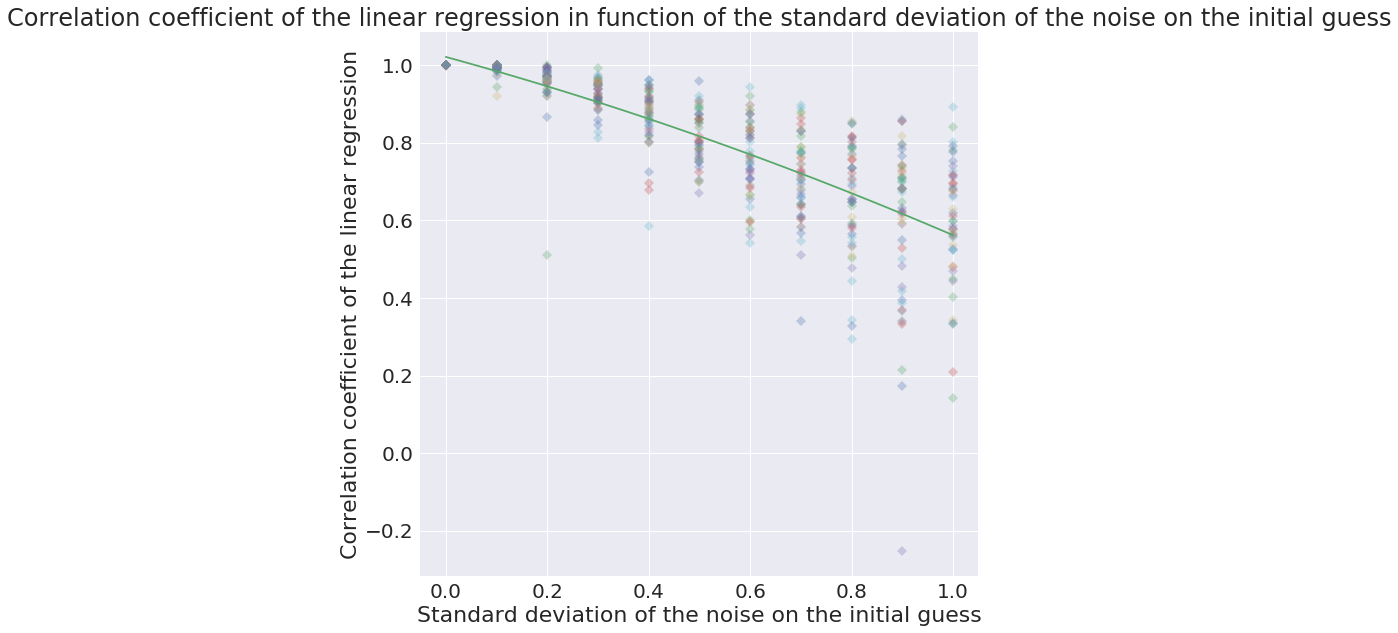

In [216]:
plt.figure(1)
plt.figure(figsize=(10,10))
# Mean gap
y = np.array(list_r)
x = np.array((0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0))
plt.plot(x,y,'D',alpha=0.3)
plt.xlabel('Standard deviation of the noise on the initial guess')
plt.ylabel('Correlation coefficient of the linear regression')
plt.title('Correlation coefficient of the linear regression in function of the standard deviation of the noise on the initial guess')

fit = np.mean(np.polyfit(x,y,2), axis=1)
p = np.poly1d(fit)
xp = np.linspace(0.0, 1.0, 100)
plt.plot(xp, p(xp), '-')
plt.grid(True)

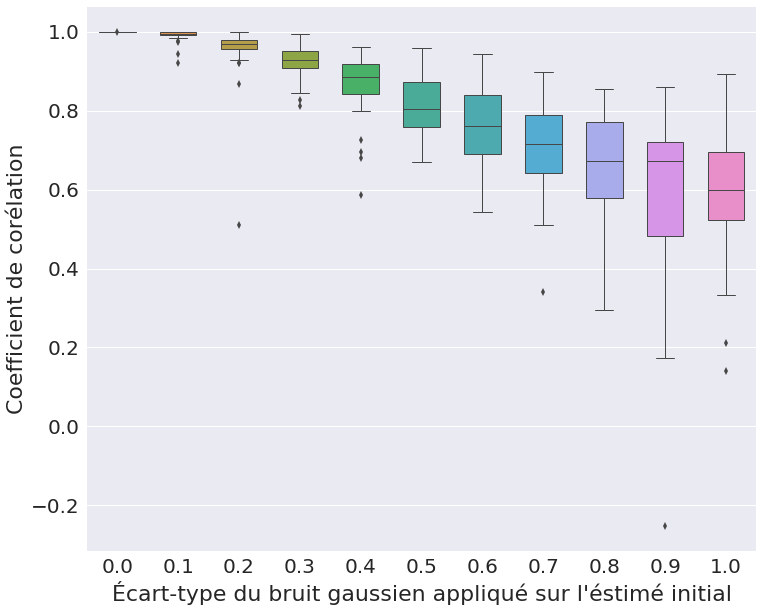

In [217]:

df = pd.DataFrame()
table_r = np.array(list_r)
table_r = np.reshape(table_r, len(list_r)*len(list_r[0]))
table_std = np.concatenate([np.full(len(list_r[0]), i) for i in (0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0)])
df['Coefficient de corélation'] = table_r
df['Écart-type du bruit gaussien appliqué sur l\'éstimé initial'] = table_std
sns.set(style="whitegrid")
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(12,10))
ax = sns.boxplot(x="Écart-type du bruit gaussien appliqué sur l\'éstimé initial", y="Coefficient de corélation", 
                 data=df, fliersize=5, linewidth = 1, width=0.6)
#ax = sns.swarmplot(x="std", y="r_value", data=df)
plt.savefig('/home/fquinton/Documents/Stage_M2_ICA-master/tyssue-taylor/simulation/lm_nr_nl_init_point_error/plot_inite.png')